# Sandbox Sensor calibration
In this tutorial we will learn the basic steps to set up the sensor for the _open AR Sandbox_. 
This not only involves tweaking of calibration parameters, but also the adjustment of your hardware component.

Let's start with importing the main module:

In [1]:
#Only useful when sandbox is not installed
import os,sys
sys.path.append('../../../')
#
from sandbox import _calibration_dir
from sandbox.sensor import Sensor, CalibSensor


### Before starting:

<div class="alert alert-block alert-warning">
    <b> Projector calibration file: </b> We will use the calibration file generated from the previous tutorial (Sandbox Projector calibration). If you have not calibrated yet the projector, please stop here and go back to the 1_calib_projector.ipynb jupyter notebook to calibrate the projector. If this is already done you can continue. 
</div>

* **Sensor**: Provides us with a frame of distance data between the sensor and the sand surface.

You can use different sensors, **KinectV1, KinectV2, LiDAR L515 or a DummySensor** to simulate a topography and/or run other Modules. For the calibration process, this is realized in the CalibSensor class. 


In [2]:
# Supported sensor types:
    # "kinect_v1"
    # "kinect_v2"
    # "lidar"
    # "dummy"

    
    
sensor_type = "kinect_v2"





## Sensor calibration

Your projector dashboard is calibrated and looks alright? Now, we need to calibrate the sensor so it exactly fits the projected main frame. First, we load the calibration file of the projector since this module needs to project the sensor image in the projector defined area. This will open a panel server with the sensor image updating, creating a simple topographic view with some color coded areas that guide you in finding the correct calibration parameters.

In [3]:
calib_proj = _calibration_dir + 'my_projector_calibration.json'
module = CalibSensor(calibprojector = calib_proj, name = sensor_type)

sandbox.sensor.kinectV2: INFO | KinectV2 initialized.
sandbox.projector.projector: INFO | JSON configuration loaded for projector


size 853 635
Launching server at http://localhost:56114
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


The sensor calibration is a bit more advanced than the projector positioning. In addition to the horizontal adjustment you also need to define vertical limits of the values, the sensor supplies. For example, this prevents unwanted model recalculations, when you move your hands above the projection area.

**Adjust your hardware**

If you call the calibrate_sensor() function you will see a current snapshot of a depth representation of your sandbox. It is easy to determine the sandboxe's edges and objects next to the sandbox, like the monitor or a chair. Position the Kinect sensor physically, so that the sensor is parallel to the sandbox surface and the outlines of the sandbox are parallel to the edges appears anymore. Each time, you have adjusted the hardware, take a new snapshot and check the visualization inside the calibration interface. Before a snapshot is taken, the software waits three seconds, allowing you to remove your hands or other objects between the sensor and the scanned surface.

**Horizontal calibration**

Afterwards, roughly adjust the first four margin sliders (blue) of the interface until the blue margin patches inside the snapshot cover the areas outisde the sandbox. Again, use the four corner poles as orientation. Those blue areas later will be cropped off by the software to focus on the area of interest.

Now, you can adjust the four margins more precisely following the life representation inside the sandbox. Place a recognizable object like a cube or a cylinder inside the sandbox to check for possible offsets. Do that in the center of the surface, as well as close to the the edges of the sandbox.

**Vertical calibration**

The vertical value range that should be registered by the sensor, can be adjusted with the red and yellow sliders. The values represent the vertical distance away from the sensor in mm. Always make sure, the yellow slider is left of the red one to avoid confusion.

Hold one hand right above the sandboxe's walls and move the yellow slider to the right until your hand is illuminated in yellow.

To calibrate the vertical maximum of the range, dig a hole inside the sand until you reach the bottom of the sandbox. Now, move the red slider until only the bottom plate is colored red. Move the slider a little bit further to the right to increase the distance slightly below the sandbox. You can always follow this process inside the interface to also get a feedback on the distances of surrounding objects behind the blue margin patches.

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] WidgetBox
                [0] Markdown(str)
                [1] TextInput(name='Choose the projector c..., value='c:\\users\\6802923\\docum...)
                [2] Button(name='Load calibration')
                [3] Markdown(str)
                [4] IntSlider(bar_color='#084C61', end=424, name='Sensor top margin', start=1, value=63)
                [5] IntSlider(bar_color='#084C61', end=512, name='Sensor right margin', start=1, value=53)
                [6] IntSlider(bar_color='#084C61', end=424, name='Sensor bottom margin', start=1, value=88)
                [7] IntSlider(bar_color='#084C61', end=512, name='Sensor left margin', start=1, value=56)
                [8] VSpacer(height=5)
                [9] Markdown(str)
                [10] IntSlider(bar_color='#DBD053', end=2000, name='Vertical minimum', value=640)
                [11] IntSlider(bar_color='#DB3A34', end=2000, name='Vertical maximum', value=876)
                [12] Button(name='Refresh sensor f...)
            [1] Matplotlib(Figure, height=300)
    [1] Column
        [0] Markdown(str)
        [1] IntSlider(bar_color='#084C61', end=2000, name='width of sandbox in mm', start=1, value=1000)
        [2] IntSlider(bar_color='#084C61', end=2000, name='height of sandbox in mm', start=1, value=800)
    [2] Column
        [0] Markdown(str)
        [1] TextInput(name='Choose a calibration f..., value='c:\\users\\6802923\\docum...)
        [2] Button(name='Save calibration')
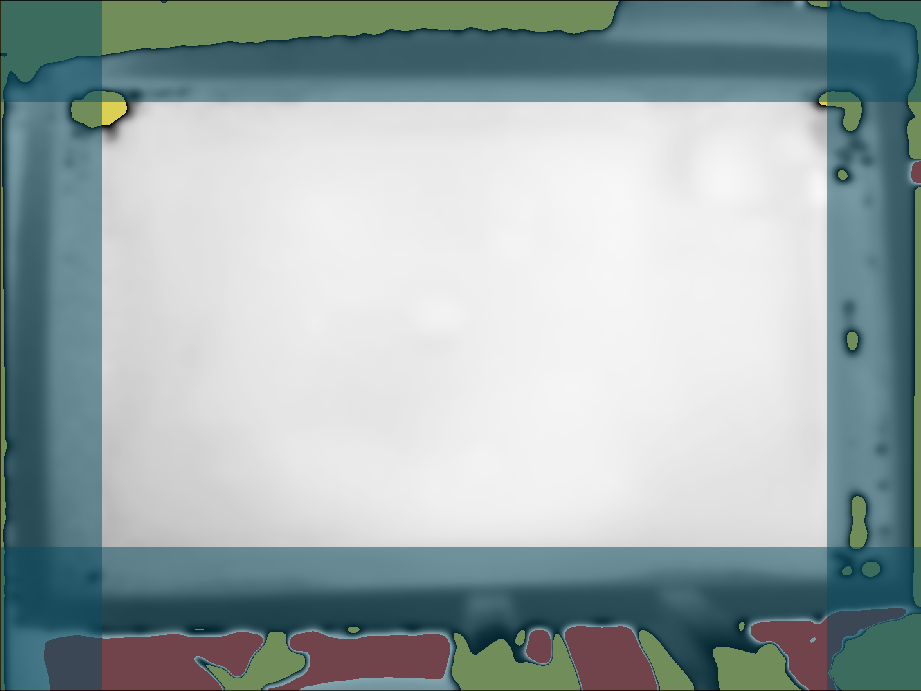

In [9]:
widget = module.calibrate_sensor()
widget

You have successfully calibrated your sandbox, and therefore, are ready to go.

## Save calibration

As in the projector calibration, we will save the sensor calibration in a JSON file for future reference. 

In [10]:
module.sensor.save_json(file=_calibration_dir+ 'my_sensor_calibration.json')

sandbox.sensor.sensor_api: INFO | JSON configuration file saved: c:\users\6802923\documents\github\open_ar_sandbox\notebooks\calibration_files\my_sensor_calibration.json


## Check the sensor is correctly calibrated

The next time you start the software, simply pass the file's location and name as an argument to the Sensor instance:

In [6]:
sensor = Sensor(calibsensor=_calibration_dir+ 'my_sensor_calibration.json', name = sensor_type)

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.kinectV2: INFO | KinectV2 initialized.


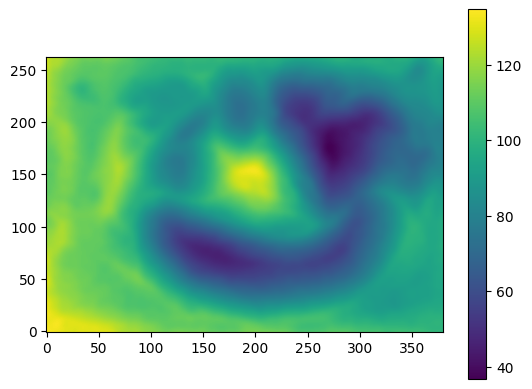

[0, 380, 0, 263, 0, 250]


In [8]:
import matplotlib.pyplot as plt
plt.imshow(sensor.get_frame(), origin="lower")
plt.colorbar()
plt.show()
print(sensor.extent)